### CH3/06 Display speed box plot
main > Ch03 > 02_06 > box_ploy.py

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the CSV file and parse the 'time' column as datetime

In [41]:
csv_file = 'track.csv'
df = pd.read_csv(csv_file, parse_dates=['time'])

Define conversion factors for latitude and longitude in kilometers

In [43]:
lat_km = 92
lng_km = 111

Function to calculate the distance traveled based on lat/lng differences

In [45]:
def distance(lat1, lng1, lat2, lng2):
    delta_lat = (lat1 - lat2) * lat_km  # Convert latitude difference to kilometers
    delta_lng = (lng1 - lng2) * lng_km  # Convert longitude difference to kilometers
    return np.hypot(delta_lat, delta_lng)  # Calculate total distance using Pythagoras' theorem

Compute distances between consecutive locations

In [47]:
dist = distance(
    df['lat'], df['lng'],
    df['lat'].shift(), df['lng'].shift(),
)

Compute the time differences between consecutive entries

In [92]:
times = df['time'].diff()
times_hour = times / pd.Timedelta(1, 'hour')  # Convert time differences to hours
times

0                        NaT
1     0 days 00:00:17.499000
2     0 days 00:00:00.926000
3     0 days 00:00:01.159000
4     0 days 00:00:01.009000
               ...          
735   0 days 00:00:03.147000
736   0 days 00:00:00.941000
737   0 days 00:00:02.940000
738   0 days 00:00:01.131000
739   0 days 00:00:08.335000
Name: time, Length: 740, dtype: timedelta64[ns]

Calculate speed as distance divided by time

In [56]:
speed = dist / times_hour

Display summary statistics for speed, including mean, standard deviation, etc.

In [59]:
print(speed.describe())

count    739.000000
mean       9.580445
std        2.937204
min        1.580769
25%        7.902295
50%        9.604717
75%       10.880122
max       38.085958
dtype: float64


Initial visualization: Boxplot for quick overview of speed distribution

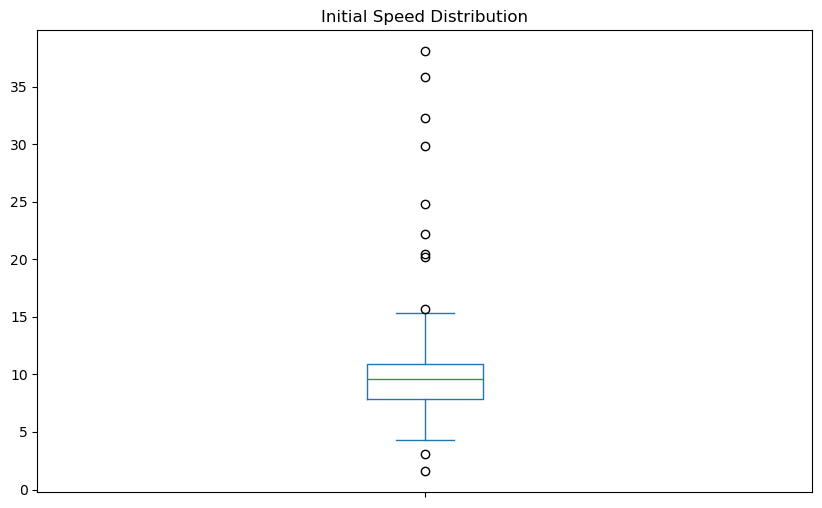

In [62]:
speed.plot.box(title="Initial Speed Distribution")
plt.show()

Improving visualization by adjusting figure size and style

In [81]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [85]:
plt.rcParams['figure.figsize'] = (10, 6)  # Set figure size to make the plot more readable
plt.style.use('seaborn-v0_8')  # Use a cleaner styling from Seaborn

Generate improved boxplot with title and formatted labels

Text(0, 0.5, 'Running speed $\\frac{km}{h}$')

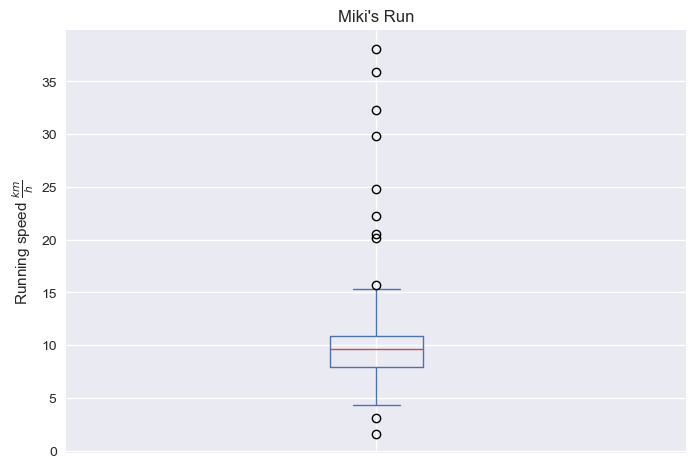

In [88]:
speed.name = ''  # Remove unwanted labels
ax = speed.plot.box(title="Miki's Run")  # Add a meaningful title to the plot
ax.set_ylabel(r'Running speed $\frac{km}{h}$')  # Use LaTeX formatting for units

In [90]:
plt.show()

# Explanation:
**Data Loading:** Reads the CSV file and converts timestamps into datetime format.

**Distance Calculation:** Converts latitude and longitude differences into kilometers using a scaling factor.

**Speed Computation:** Divides the total distance traveled by the elapsed time to determine speed.

**Boxplot Visualization:** Provides an overview of speed distribution with whiskers showing interquartile ranges and outliers.

**Chart Enhancement:** Uses seaborn-whitegrid style and sets figure size to improve readability.

**Final Presentation Adjustments:** Adds titles and formatted labels to clarify chart information.

[Context_Python_Scientific_Stack](./../../Context_Python_Scientific_Stack.md)